* 년도별 도시가스/프로판 판매량 비율
* 년도별 도시가스, 년도별 프로판 사용량 상관도
* 도시가스 년도별 겨울철 평균사용량(10-3), 비겨울철 평균사용량(4-9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
np.set_printoptions(precision=5, suppress=True)

def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def split_len(data_list):
    len_list=[]
    for e in data_list:
        len_list.append(len(e))
    print(set(len_list))
    if len(set(len_list))>1:
        for i in set(len_list):
            print(i, len_list.count(i))

In [13]:
csv_data=[]
with open('가스공급량_20230220143207.csv') as f:
    for line in f:
        csv_data.append(line[:-1].split(','))
t = set()
for e in csv_data:
    t.add(len(e))
print(t)

np_data = np.array(csv_data[2:])
np_data = np_data[:,2:].astype(np.int64)
print(np_data[:3])
# for i in enumerate(np_data[1]):
#     print(i)

{8}
[[     1 179086    311   8775     64  26227]
 [     1 139496    311   8745     64  23518]
 [     1 143581    311   8092     64  23959]]


[[     12 1275714    3732   91657     768  289391]
 [     12 1297954    3492  107350     804  282017]
 [     12 1359726    3358  104294     852  268913]]


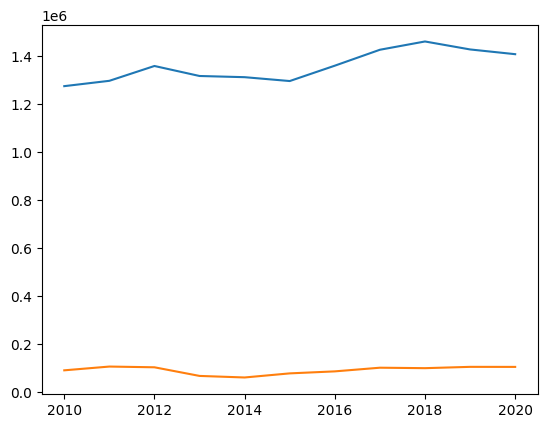

In [16]:
# print(np_data.shape)
by_year = np.add.reduceat(np_data, np.arange(0,130,12))
print(by_year[:3])

total_gas = by_year[:,1] + by_year[:,3]
ln_gas = by_year[:,1]/total_gas

_, axe = plt.subplots()
axe.plot(np.arange(2010,2021), by_year[:,1]) # 년도별 도시가스 총 사용량
# axe.plot(np.arange(2010,2021), by_year[:,3]) # 년도별 프로판가스 총 사용량
# axe.plot(np.arange(2010,2021), by_year[:,1]/12) # 년도별 도시가스 평균 사용량
# axe.plot(np.arange(2010,2021), ln_gas) # 년도별 도시가스+프로판 사용량 대비, 도시가스 사용량 비율

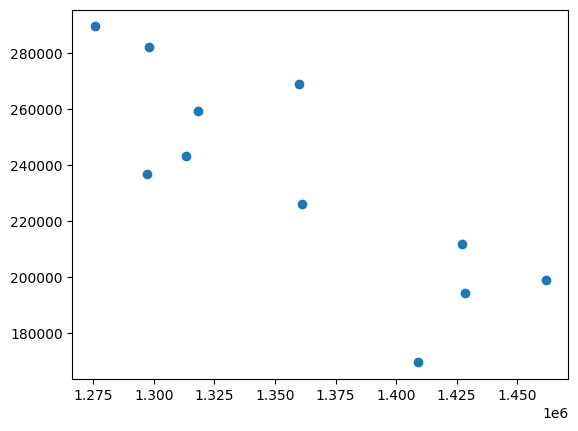

In [43]:
np.corrcoef(by_year[:,1],by_year[:,5])
_, axe = plt.subplots()
axe.scatter(by_year[:,1],by_year[:,5])

In [32]:
# print(np_data[:10])
by_season = np.add.reduceat(np_data[3:],np.arange(0,130,6))
print(by_season[:3])

print('****')
summers_sum = by_season[::2]
print(summers_sum[:2])
winters_sum = by_season[1::2]
print(winters_sum[:2])

[[     6 461211   1866  41722    384 142333]
 [     6 843029   1806  59549    393 146533]
 [     6 462670   1746  53486    402 140882]]
****
[[     6 461211   1866  41722    384 142333]
 [     6 462670   1746  53486    402 140882]]
[[     6 843029   1806  59549    393 146533]
 [     6 840697   1711  53252    414 140133]]


In [37]:
# 2010년 여름 평균 사용량: 프로판 가스
lp_gas2010_summer = np_data[3:9,3]
print(lp_gas2010_summer)
# print(summers_sum[0])
# print(np_data[3:9])
#2010-2011년 겨율 평균 사용량 : 프로판 가스
lp_gas2010_winter = np_data[9:15,3]
print(lp_gas2010_winter)
# print(winters_sum[0])
# print(np_data[9:15])

# ttest 귀무가설, 두 개의 mean 값은 같은 모집단에서 나온 것, 두개의 mean값을 같은 것으로 보아야 한다.
stats.ttest_ind(lp_gas2010_summer,lp_gas2010_winter)

[8105 7787 7137 5928 6023 6742]
[ 6366  8560  9397 12137 10072 13017]


Ttest_indResult(statistic=-2.8201037966265856, pvalue=0.01815747444106195)

In [40]:
# 2011년 여름, 2011-2012년 겨울 도시가스 사용량 ttest_ind
lp_gas2011_summer = np_data[15:21,1]
print(lp_gas2011_summer)
lp_gas2011_winter = np_data[21:27,1]
print(lp_gas2011_winter)
stats.ttest_ind(lp_gas2011_summer,lp_gas2011_winter)

[103965  83355  74141  70168  64615  66426]
[ 81153  99188 164254 178441 173008 144653]


Ttest_indResult(statistic=-3.5606327383239305, pvalue=0.005175795051470046)

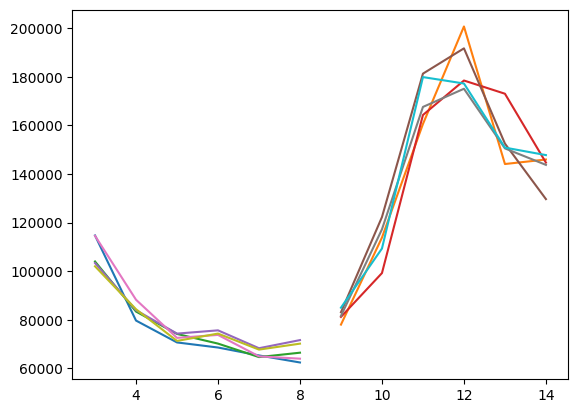

In [42]:
_,axe = plt.subplots()
year = 2010
gas_index = 1
for i in range(0,10,2):
    j=3+6*i
    summer = np_data[j:j+6]
    winter = np_data[j+6:j+12]
    axe.plot(np.arange(3,9), summer[:,gas_index])
    axe.plot(np.arange(9,15), winter[:,gas_index])
    